In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Load the data

size = "lin_"   # "", 'lin_', 'log_'

if size == "":
    subset_sizes = [20, 50, 100, 200, 300, 500, 2000, 5000, 10000, 20000, 25000]
elif size == 'lin_':    
    subset_sizes = [1000,  3500,  6000,  8500, 11000, 13500, 16000, 18500, 21000, 23500, 26000]
elif size == 'log_':
    subset_sizes = [10,20,30,50,90,160,280,500,900,1500,2600,4700,8200,14300,25000]

cb_mass = np.load(f'../data/results/Subsets/cb_corr_{size}mass.npy').T
cb_tarsus = np.load(f'../data/results/Subsets/cb_corr_{size}tarsus.npy').T
cb_wing = np.load(f'../data/results/Subsets/cb_corr_{size}wing.npy').T

lgb_mass = np.load(f'../data/results/Subsets/lgb_corr_{size}mass.npy').T
lgb_tarsus = np.load(f'../data/results/Subsets/lgb_corr_{size}tarsus.npy').T
lgb_wing = np.load(f'../data/results/Subsets/lgb_corr_{size}wing.npy').T

xgb_mass = np.load(f'../data/results/Subsets/xgb_corr_{size}mass.npy').T
xgb_tarsus = np.load(f'../data/results/Subsets/xgb_corr_{size}tarsus.npy').T
xgb_wing = np.load(f'../data/results/Subsets/xgb_corr_{size}wing.npy').T

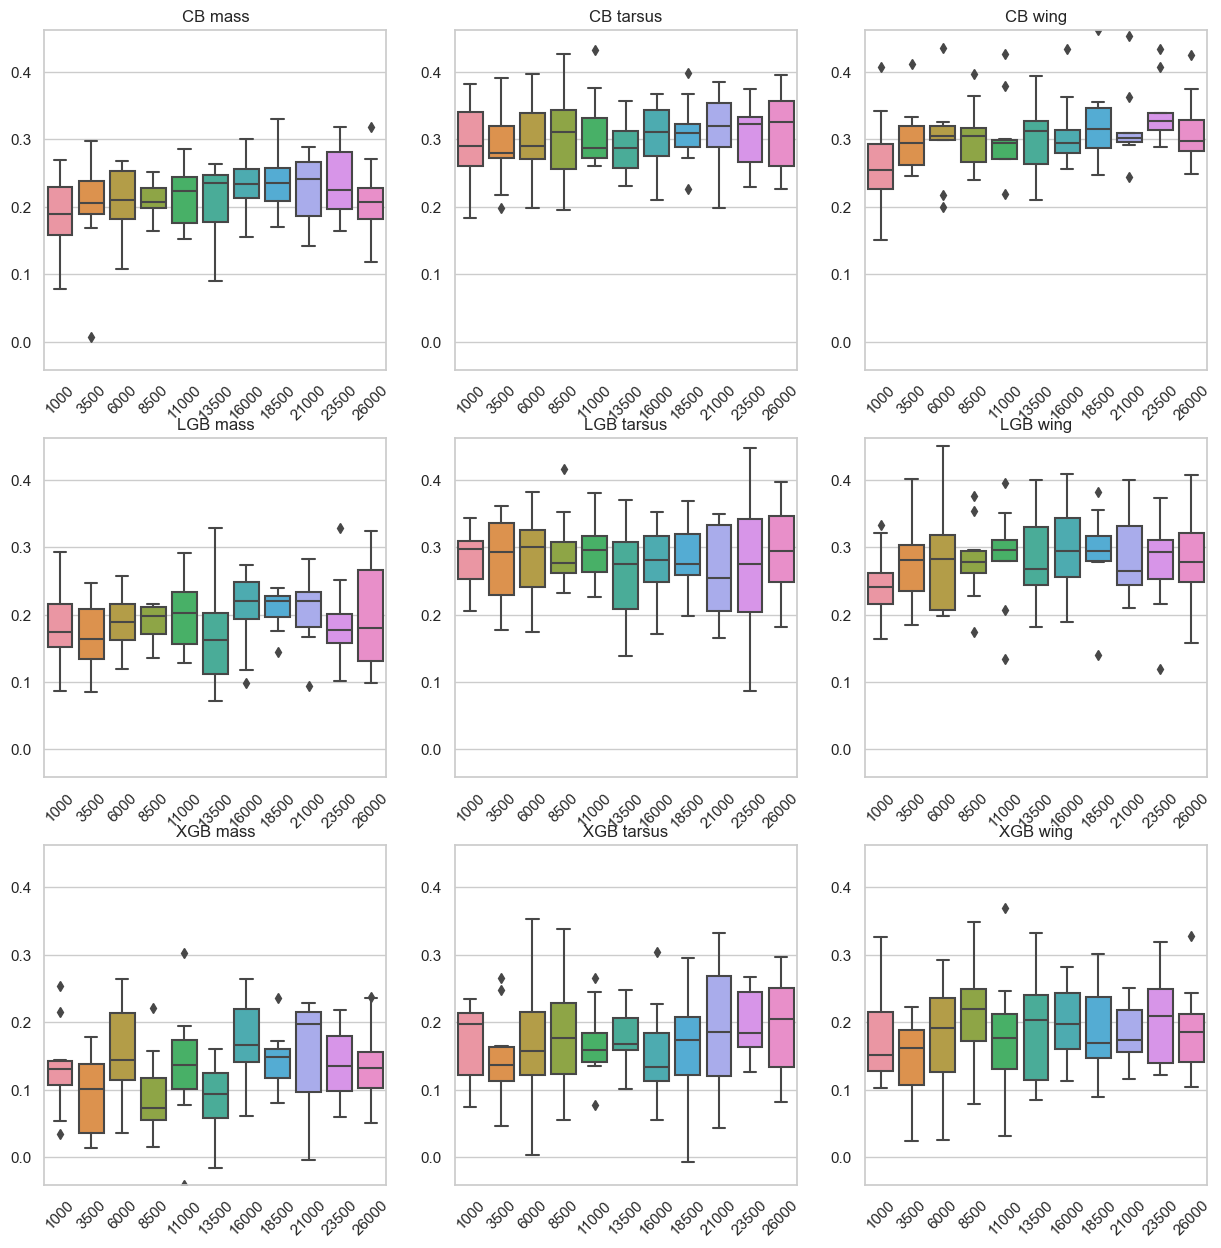

In [3]:
# Create 3x3 grid of boxplots and plot the data
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot the data
sns.boxplot(data=cb_mass, ax=axes[0, 0])
sns.boxplot(data=cb_tarsus, ax=axes[0, 1])
sns.boxplot(data=cb_wing, ax=axes[0, 2])

sns.boxplot(data=lgb_mass, ax=axes[1, 0])
sns.boxplot(data=lgb_tarsus, ax=axes[1, 1])
sns.boxplot(data=lgb_wing, ax=axes[1, 2])

sns.boxplot(data=xgb_mass, ax=axes[2, 0])
sns.boxplot(data=xgb_tarsus, ax=axes[2, 1])
sns.boxplot(data=xgb_wing, ax=axes[2, 2])

# Determine the common y-axis limits
y_min = min(cb_mass.min(), cb_tarsus.min(), cb_wing.min(), lgb_mass.min(), lgb_tarsus.min(), lgb_wing.min(), xgb_mass.min(), xgb_tarsus.min(), xgb_wing.min())
y_max = max(cb_mass.max(), cb_tarsus.max(), cb_wing.max(), lgb_mass.max(), lgb_tarsus.max(), lgb_wing.max(), xgb_mass.max(), xgb_tarsus.max(), xgb_wing.max())

# Set the y-axis limits for all subplots
for ax in axes.flat:
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(range(len(subset_sizes)))
    ax.set_xticklabels(subset_sizes, rotation=45)   

# Set the labels
axes[0, 0].set_title('CB mass')
axes[0, 1].set_title('CB tarsus')
axes[0, 2].set_title('CB wing')

axes[1, 0].set_title('LGB mass')
axes[1, 1].set_title('LGB tarsus')
axes[1, 2].set_title('LGB wing')

axes[2, 0].set_title('XGB mass')
axes[2, 1].set_title('XGB tarsus')
axes[2, 2].set_title('XGB wing')

plt.show()


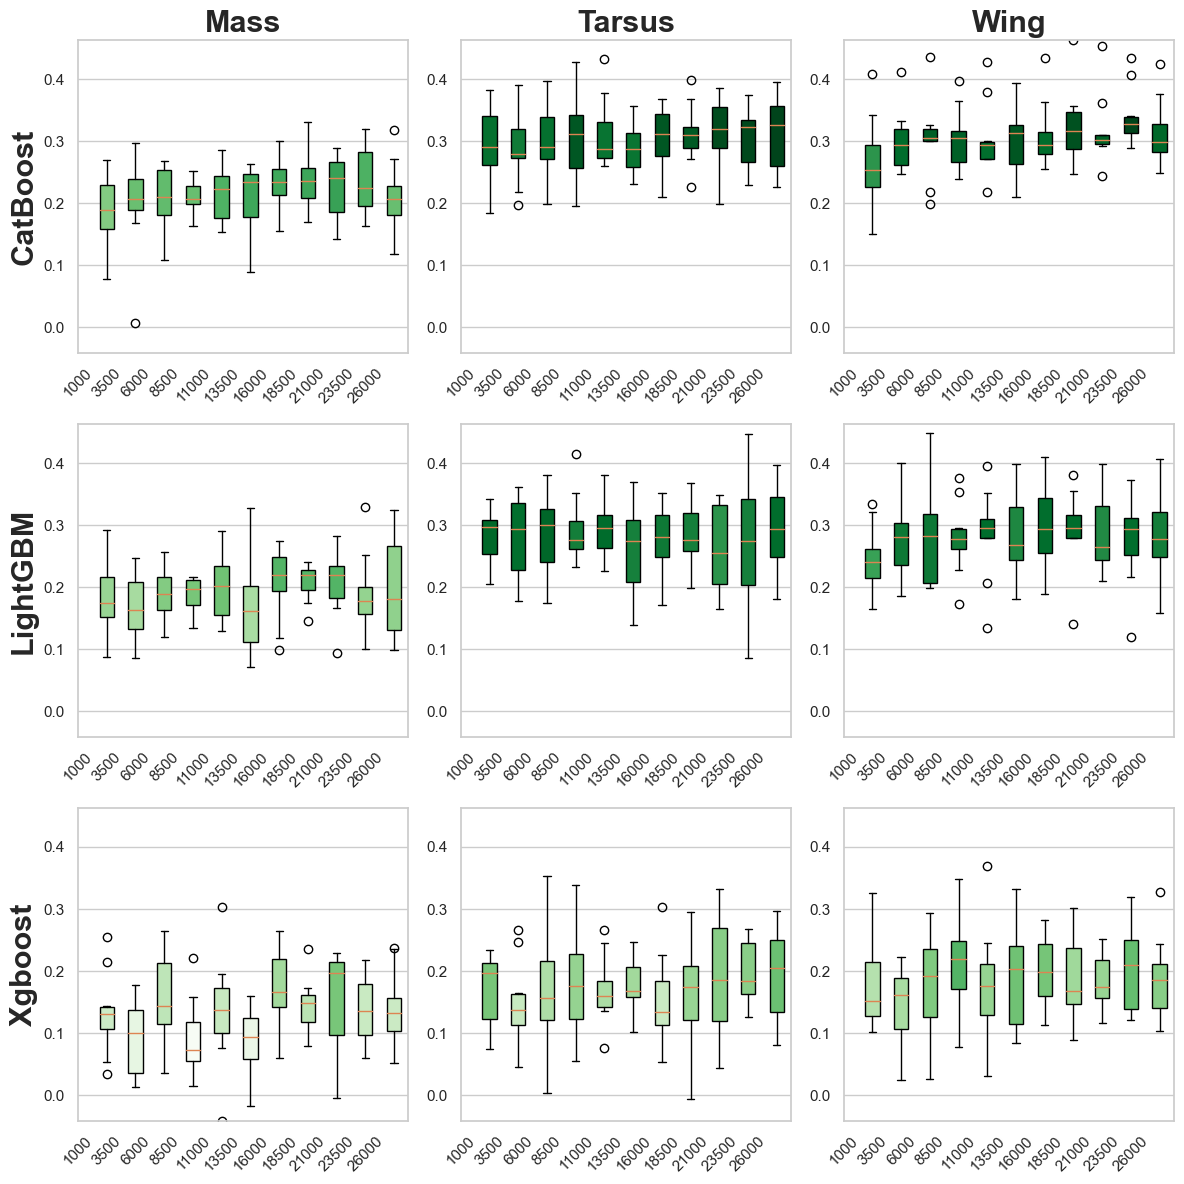

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming the data is already loaded into these variables
# cb_mass, cb_tarsus, cb_wing, lgb_mass, lgb_tarsus, lgb_wing, xgb_mass, xgb_tarsus, xgb_wing


# Calculate medians
cb_mass_medians = np.median(cb_mass, axis=0)
cb_tarsus_medians = np.median(cb_tarsus, axis=0)
cb_wing_medians = np.median(cb_wing, axis=0)

lgb_mass_medians = np.median(lgb_mass, axis=0)
lgb_tarsus_medians = np.median(lgb_tarsus, axis=0)
lgb_wing_medians = np.median(lgb_wing, axis=0)

xgb_mass_medians = np.median(xgb_mass, axis=0)
xgb_tarsus_medians = np.median(xgb_tarsus, axis=0)
xgb_wing_medians = np.median(xgb_wing, axis=0)

# Combine all medians to find the global min and max for normalization
all_medians = cb_mass_medians.tolist() + cb_tarsus_medians.tolist() + cb_wing_medians.tolist() + \
              lgb_mass_medians.tolist() + lgb_tarsus_medians.tolist() + lgb_wing_medians.tolist() + \
              xgb_mass_medians.tolist() + xgb_tarsus_medians.tolist() + xgb_wing_medians.tolist()

norm = Normalize(vmin=min(all_medians), vmax=max(all_medians))
cmap = plt.get_cmap('Greens')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create 3x3 grid of boxplots and plot the data
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Function to create colored boxplots
def create_colored_boxplot(ax, data, medians, title=None, ylabel=None):
    boxplot = ax.boxplot(data, patch_artist=True)
    
    # Color the boxes based on the normalized median values
    for i, box in enumerate(boxplot['boxes']):
        col = cmap(norm(medians[i]))
        box.set_facecolor(col)

    # Plot the trend line
    #ax.plot(range(1, len(subset_sizes)+1), medians, color="red")
    ax.set_xticks(range(1, len(subset_sizes)+1))
    ax.set_xticklabels(subset_sizes, rotation=45)
    ax.set_title(title, fontsize=22, fontweight='bold')    
    ax.set_ylabel(ylabel, fontsize=22, fontweight='bold')

# Plot the data
create_colored_boxplot(axes[0, 0], cb_mass, cb_mass_medians, 'Mass', 'CatBoost')
create_colored_boxplot(axes[0, 1], cb_tarsus, cb_tarsus_medians, 'Tarsus')
create_colored_boxplot(axes[0, 2], cb_wing, cb_wing_medians, 'Wing')

create_colored_boxplot(axes[1, 0], lgb_mass, lgb_mass_medians, title=None, ylabel='LightGBM')
create_colored_boxplot(axes[1, 1], lgb_tarsus, lgb_tarsus_medians)
create_colored_boxplot(axes[1, 2], lgb_wing, lgb_wing_medians)

create_colored_boxplot(axes[2, 0], xgb_mass, xgb_mass_medians, title = None, ylabel = 'Xgboost')
create_colored_boxplot(axes[2, 1], xgb_tarsus, xgb_tarsus_medians)
create_colored_boxplot(axes[2, 2], xgb_wing, xgb_wing_medians)

# Determine the common y-axis limits
y_min = min(cb_mass.min(), cb_tarsus.min(), cb_wing.min(), lgb_mass.min(), lgb_tarsus.min(), lgb_wing.min(), xgb_mass.min(), xgb_tarsus.min(), xgb_wing.min())
y_max = max(cb_mass.max(), cb_tarsus.max(), cb_wing.max(), lgb_mass.max(), lgb_tarsus.max(), lgb_wing.max(), xgb_mass.max(), xgb_tarsus.max(), xgb_wing.max())

# Set the y-axis limits for all subplots
for ax in axes.flat:
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(range(len(subset_sizes)))
    ax.set_xticklabels(subset_sizes, rotation=45)   
    ax.grid(axis='x')

# Add color bar
#cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.1)
#cbar.set_label('Median Value')

plt.tight_layout()
plt.show()